<a href="https://colab.research.google.com/github/renanmartinssantos/dio-transfer-learning/blob/main/Transfer_Learning_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import numpy as np

In [108]:
def split_data(SOURCE, TRAINING, TESTING, SPLITSIZE):
    os.makedirs(TRAINING, exist_ok=True)
    os.makedirs(TESTING, exist_ok=True)

    files = []
    for filename in os.listdir(SOURCE):
        file = os.path.join(SOURCE, filename)
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLITSIZE)
    testing_length = len(files) - training_length

    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TRAINING, filename)
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = os.path.join(SOURCE, filename)
        destination = os.path.join(TESTING, filename)
        copyfile(this_file, destination)

In [90]:
SCALLET_SOURCE_DIR = "/content/celebrity/Scarlett Johansson"
TRAINING_SCALLET_DIR = "/content/celebrity/TreinoTeste/train/Scarlett Johansson/"
TESTING_SCALLET_DIR = "/content/celebrity/TreinoTeste/validation/Scarlett Johansson/"
LEONARDO_SOURCE_DIR = "/content/celebrity/Leonardo DiCaprio"
TRAINING_LEONARDO_DIR = "/content/celebrity/TreinoTeste/train/Leonardo DiCaprio/"
TESTING_LEONARDO_DIR = "/content/celebrity/TreinoTeste/validation/Leonardo DiCaprio/"

os.makedirs(TRAINING_SCALLET_DIR, exist_ok=True)
os.makedirs(TESTING_SCALLET_DIR, exist_ok=True)
os.makedirs(TRAINING_LEONARDO_DIR, exist_ok=True)
os.makedirs(TESTING_LEONARDO_DIR, exist_ok=True)

split_size = 0.8
split_data(SCALLET_SOURCE_DIR, TRAINING_SCALLET_DIR, TESTING_SCALLET_DIR, split_size)
split_data(LEONARDO_SOURCE_DIR, TRAINING_LEONARDO_DIR, TESTING_LEONARDO_DIR, split_size)

In [91]:
train_dir = '/content/celebrity/TreinoTeste/train'
validation_dir = '/content/celebrity/TreinoTeste/validation'

In [92]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [93]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(150, 150, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


<ipython-input-93-b7d3a872d38e>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


In [94]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [95]:
history = model.fit(
    train_generator,
    steps_per_epoch=90,
    validation_data=validation_generator,
    validation_steps=6,
    epochs=10
)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.8146 - loss: 0.3928 - val_accuracy: 0.9167 - val_loss: 0.1543
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9348 - loss: 0.1707 - val_accuracy: 0.9667 - val_loss: 0.0840
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9676 - loss: 0.0840 - val_accuracy: 0.9667 - val_loss: 0.0674
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9710 - loss: 0.1066 - val_accuracy: 0.9667 - val_loss: 0.0468
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9452 - loss: 0.1282 - val_accuracy: 0.9667 - val_loss: 0.0532
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9799 - loss: 0.0884 - val_accuracy: 0.9833 - val_loss: 0.0334
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9665 - loss: 0.0999 - val_accuracy: 0.9667 - val_loss: 0.0547
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9703 - loss: 0.0779 - val_accuracy: 0.9667 - val_lo

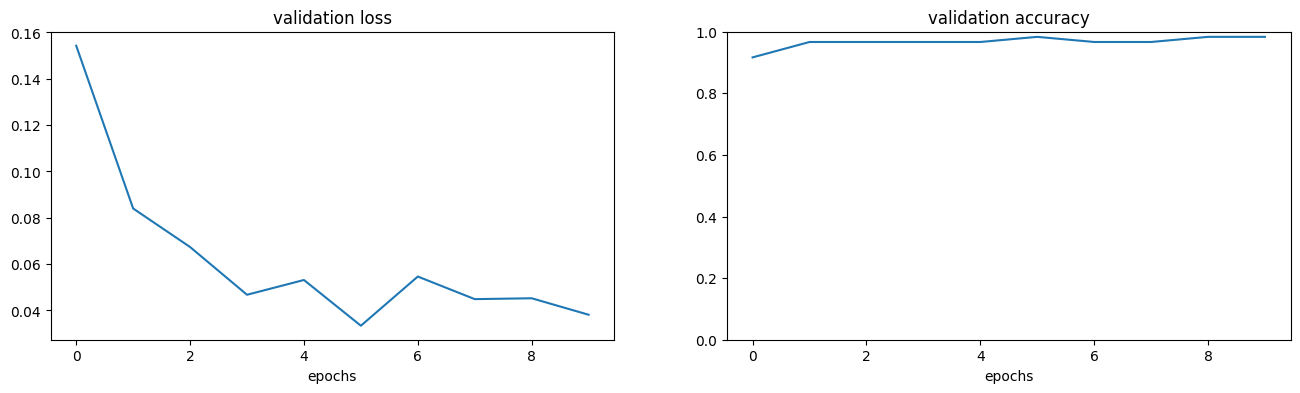

In [96]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [97]:
test_loss, test_acc = model.evaluate(validation_generator)
print(f"Acurácia no conjunto de validação: {test_acc:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.9785 - loss: 0.0457
Acurácia no conjunto de validação: 0.98


In [98]:
model.save('ScalletLeonardoModel.h5')

In [106]:
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def predict_image_class(img_path, model):
    img_array = load_and_preprocess_image(img_path)

    predictions = model.predict(img_array)
    predicted_class = 'leonardo' if predictions[0] < 0.5 else 'scarlett'

    print(f"A imagem é de: {predicted_class} com  {predictions[0]}")

image_paths = [
    '/content/Testes/scarlett.jpg',
    '/content/Testes/leonardo.jpg',
    '/content/Testes/scarlett2.jpg',
    '/content/Testes/leonardo2.jpg',
]

for img_path in image_paths:
    print(f"Analisando a imagem: {img_path}")
    predict_image_class(img_path, model)
    print()

Analisando a imagem: /content/Testes/scarlett.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
A imagem é de: scarlett com  [0.95359075]

Analisando a imagem: /content/Testes/leonardo.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
A imagem é de: leonardo com  [0.00030337]

Analisando a imagem: /content/Testes/scarlett2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
A imagem é de: scarlett com  [0.9990823]

Analisando a imagem: /content/Testes/leonardo2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
A imagem é de: leonardo com  [0.3624798]

